## loading eye data

In [4]:
import os
import numpy as np
import pandas as pd
from sklearn import preprocessing 
import neptune

In [5]:
data_dir_ = 'data/eye_feature_smooth/'

In [15]:
neptune.init(api_token='eyJhcGlfYWRkcmVzcyI6Imh0dHBzOi8vdWkubmVwdHVuZS5haSIsImFwaV91cmwiOiJodHRwczovL3VpLm5lcHR1bmUuYWkiLCJhcGlfa2V5IjoiZGNhOGU5MGItZjBhNi00M2IyLWJkMmYtYmFjZDAxMDUyMTNlIn0=',
            project_qualified_name='Porsche/workshop')

nep_ex =  neptune.create_experiment()

psutil is not installed. The experiment will not be abortable.
psutil is not installed. The experiment will not be abortable.
psutil is not installed. Hardware metrics will not be collected.


https://ui.neptune.ai/Porsche/workshop/e/WOR-3


In [117]:
X = np.load(data_dir_ + 'data_X.npy')
Y = np.load(data_dir_ + 'data_Y.npy')
P = np.load(data_dir_ + 'data_P.npy')
colnames = np.load(data_dir_ + 'data_colnames.npy')
S = np.load(data_dir_ + 'data_S.npy')
print(X.shape)

(1080, 31, 64)


In [17]:
flatten_colnames = []
for colname in colnames:
    #create array with 64 dimensions
    col_array = np.repeat(str(colname),  64)
    for i in range(col_array.shape[0]):
        col_array[i] = col_array[i] + '_' + str(i)
        #print(col_array[i] + '_' + str(i))
        flatten_colnames.append(col_array[i] + '_' + str(i))
        #print(col_array[i])
    #flatten_colnames.append(col_array)
    
flatten_colnames = np.asarray(flatten_colnames, dtype = 'str')

In [18]:
X_flatten = X.reshape((X.shape[0], -1)) #flatten the dimensions of the input (2d -> 1d)
X_flatten = np.nan_to_num(X_flatten, copy=True) #if NAN exist -> replace by 0.0
X_flatten_mean  = np.nanmean(X, axis = 2) #ignore NAN in mean

enc_label = preprocessing.LabelBinarizer()
enc_part = preprocessing.LabelBinarizer()
#Y = enc_label.fit_transform(Y)
#P = enc_part.fit_transform(P)
print(X_flatten_mean.shape)

(1080, 31)


## Dataset Overview

In [19]:
df_X = pd.DataFrame(data = X_flatten, columns = flatten_colnames)
df_X.head()

,pupil_diam_x_mean_0,pupil_diam_x_mean_1,pupil_diam_x_mean_2,pupil_diam_x_mean_3,pupil_diam_x_mean_4,pupil_diam_x_mean_5,pupil_diam_x_mean_6,pupil_diam_x_mean_7,pupil_diam_x_mean_8,pupil_diam_x_mean_9,...,saccade latency average_54,saccade latency average_55,saccade latency average_56,saccade latency average_57,saccade latency average_58,saccade latency average_59,saccade latency average_60,saccade latency average_61,saccade latency average_62,saccade latency average_63
0,123.795894,123.791648,123.781341,123.759652,123.729548,123.691124,123.641547,123.593147,123.542052,123.496627,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,131.186279,131.176575,131.169002,131.166994,131.164997,131.167228,131.169112,131.173999,131.186837,131.217438,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,137.617985,137.612553,137.617400,137.627022,137.649115,137.689314,137.745398,137.810562,137.879117,137.947199,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,89.051657,89.051507,89.074794,89.105582,89.135208,89.158187,89.177362,89.178100,89.154389,89.108758,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,146.221369,146.248473,146.292151,146.344926,146.402855,146.453996,146.494440,146.530620,146.564069,146.585374,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#create dataframe
df_plot = pd.DataFrame({'emotion':Y, 'participant': P})
df_plot.head()

,emotion,participant
0,1,4
1,2,4
2,3,4
3,0,4
4,2,4


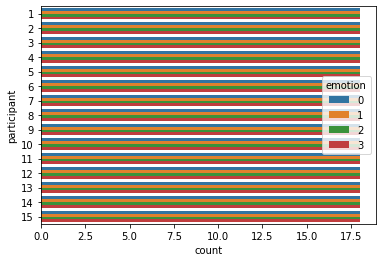

In [21]:
#plot overview of label/participant distribution
x = sns.countplot(y="participant", hue="emotion", data=df_plot)

## Learn classifier

### learn classifier on X_mean:

In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from lib import print_confusion_matrix

X_train, X_holdout, Y_train, Y_holdout =  train_test_split(X_flatten_mean, Y, test_size=0.1, random_state=0)

/Users/davidbethge/anaconda3/envs/tfnn/lib/python3.6/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/Users/davidbethge/anaconda3/envs/tfnn/lib/python3.6/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/Users/davidbethge/anaconda3/envs/tfnn/lib/python3.6/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/Users/davidbethge/anaconda3/envs/tfnn/lib/python3.6/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with Sta

/Users/davidbethge/anaconda3/envs/tfnn/lib/python3.6/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/Users/davidbethge/anaconda3/envs/tfnn/lib/python3.6/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/Users/davidbethge/anaconda3/envs/tfnn/lib/python3.6/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/Users/davidbethge/anaconda3/envs/tfnn/lib/python3.6/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with Sta

<Figure size 432x288 with 0 Axes>

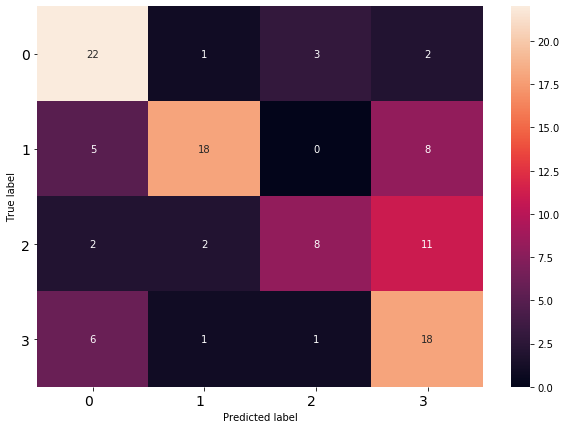

In [25]:


parameters = {'kernel':('linear', 'rbf'), 'C':[1, 5, 10, 50, 100]}

clf_svm = svm.SVC(gamma = 'scale', max_iter = 100000)

clf = GridSearchCV(clf_svm, parameters, cv = 10)
clf.fit(X_train, Y_train)
best_clf = svm.SVC(**clf.best_params_)



best_clf.fit(X_holdout, Y_holdout)
Y_pred = best_clf.predict(X_holdout)


cm = confusion_matrix(Y_holdout, Y_pred)

fig_cm = print_confusion_matrix(confusion_matrix = cm,
                       class_names = np.unique(Y).astype('str') ,
                       figsize = (10,7), fontsize=14)

#plt.show()

acc = metrics.accuracy_score(Y_holdout, Y_pred)

nep_ex.send_metric('accuracy_SVM_holdout', acc) 
nep_ex.send_image('cm_SVM', fig_cm)
nep_ex.send_text('clf.best_params_', str( clf.best_params_ ))

In [37]:
#kfold cross-validation

from sklearn.model_selection import KFold


kf = KFold(n_splits=10)

split = 0
for train_index, test_index in kf.split(X_train):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train2, X_test, Y_train2, Y_test = X_train[train_index], X_train[test_index], Y_train[train_index], Y_train[test_index]
    best_clf.fit(X_train2, Y_train2)
    
    
    Y_pred2 = best_clf.predict(X_test)
    acc = metrics.accuracy_score(Y_test, Y_pred2)
    clf_rep = metrics.classification_report(Y_test, Y_pred2, labels= [0,1,2,3],  output_dict = True)
    nep_ex.send_metric('accuracy_SVM_innerkfold', acc) 
    nep_ex.send_text('clfreport_SVM_innerkfold', str(clf_rep))
    split+= 1

In [36]:
clf_rep = metrics.classification_report(Y_test, Y_pred2, labels= [0,1,2,3], output_dict = True)
clf_rep

{'0': {'precision': 0.5294117647058824,
  'recall': 0.6923076923076923,
  'f1-score': 0.5999999999999999,
  'support': 26},
 '1': {'precision': 0.3,
  'recall': 0.2727272727272727,
  'f1-score': 0.28571428571428564,
  'support': 22},
 '2': {'precision': 0.3125,
  'recall': 0.20833333333333334,
  'f1-score': 0.25,
  'support': 24},
 '3': {'precision': 0.4074074074074074,
  'recall': 0.44,
  'f1-score': 0.4230769230769231,
  'support': 25},
 'accuracy': 0.41237113402061853,
 'macro avg': {'precision': 0.38732979302832243,
  'recall': 0.40334207459207455,
  'f1-score': 0.38969780219780215,
  'support': 97},
 'weighted avg': {'precision': 0.39226691822204257,
  'recall': 0.41237113402061853,
  'f1-score': 0.39652203466636443,
  'support': 97}}

In [74]:
##. Random Forest
from sklearn.ensemble import RandomForestRegressor

parameters = {'n_estimators':[5,10, 20, 100, 500], 'max_depth': [2,5,10,20,50]}

clf_rf = RandomForestRegressor(random_state = 0)

clf = GridSearchCV(clf_rf, parameters, cv = 10)
clf.fit(X_train, Y_train)


GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=0,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs

In [75]:
clf.best_params_

{'max_depth': 50, 'n_estimators': 100}

In [76]:
best_clf = RandomForestRegressor(**clf.best_params_, random_state = 0)



best_clf.fit(X_holdout, Y_holdout)
Y_pred = best_clf.predict(X_holdout)
acc_rf_holdout = metrics.accuracy_score(Y_holdout, Y_pred.round(0))
print(f'accuracy on holdout {acc_rf_holdout}')
clf_rep_rf = metrics.classification_report(Y_holdout, Y_pred.round(0), labels= [0,1,2,3],  output_dict = True)
clf_rep_rf

accuracy on holdout 0.7870370370370371


{'0': {'precision': 1.0,
  'recall': 0.7142857142857143,
  'f1-score': 0.8333333333333333,
  'support': 28},
 '1': {'precision': 0.7567567567567568,
  'recall': 0.9032258064516129,
  'f1-score': 0.823529411764706,
  'support': 31},
 '2': {'precision': 0.6111111111111112,
  'recall': 0.9565217391304348,
  'f1-score': 0.7457627118644068,
  'support': 23},
 '3': {'precision': 1.0,
  'recall': 0.5769230769230769,
  'f1-score': 0.7317073170731707,
  'support': 26},
 'accuracy': 0.7870370370370371,
 'macro avg': {'precision': 0.8419669669669669,
  'recall': 0.7877390841977097,
  'f1-score': 0.7835831935089042,
  'support': 108},
 'weighted avg': {'precision': 0.847361250139028,
  'recall': 0.7870370370370371,
  'f1-score': 0.7874044232853982,
  'support': 108}}

Text(0.5, 0, 'relative importance')

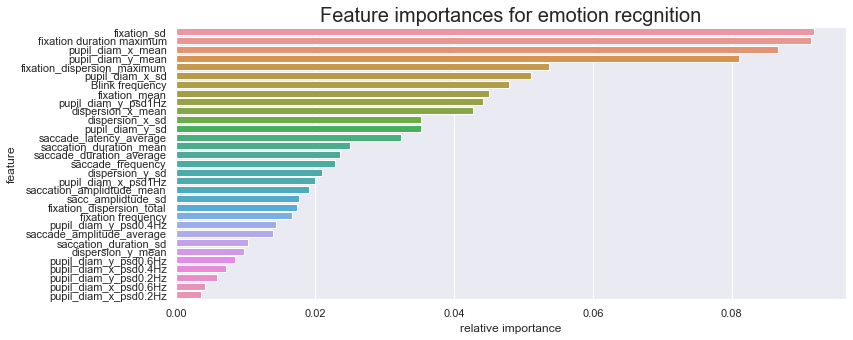

In [112]:
f_impo = best_clf.feature_importances_
col_names = ['pupil_diam_x_mean', 'pupil_diam_y_mean', 'pupil_diam_x_sd', 'pupil_diam_y_sd', 'pupil_diam_x_psd0.2Hz',
               'pupil_diam_y_psd0.2Hz', 'pupil_diam_x_psd0.4Hz', 'pupil_diam_y_psd0.4Hz', 'pupil_diam_x_psd0.6Hz', 
               'pupil_diam_y_psd0.6Hz', 'pupil_diam_x_psd1Hz', 'pupil_diam_y_psd1Hz',
				'dispersion_x_mean', 'dispersion_y_mean', 'dispersion_x_sd', 'dispersion_y_sd',
				'fixation_mean', 'fixation_sd',
				'saccation_duration_mean', 'saccation_duration_sd', 'saccation_amplidtude_mean', 'sacc_amplidtude_sd',
				'Blink frequency', 'fixation frequency', 'fixation duration maximum', 
               'fixation_dispersion_total', 'fixation_dispersion_maximum', 
               'saccade_frequency', 'saccade_duration_average', 
               'saccade_amplitude_average', 'saccade_latency_average']
df_feature_im = pd.DataFrame({'importance_value':f_impo, 'feature':col_names})

sns.set(rc={'figure.figsize':(12,5)})
fig = sns.barplot(x = 'importance_value', y = 'feature', 
                  data =df_feature_im.sort_values(by = 'importance_value', ascending = False))

fig.set_title('Feature importances for emotion recgnition', size = 20)
fig.set_xlabel('relative importance')

## Cross Participant accuracy

group/participant in Train: [ 2  3  4  5  6  7  8  9 10 11 12 13 14 15] and Test: [1]
group/participant in Train: [ 1  3  4  5  6  7  8  9 10 11 12 13 14 15] and Test: [2]
group/participant in Train: [ 1  2  4  5  6  7  8  9 10 11 12 13 14 15] and Test: [3]
group/participant in Train: [ 1  2  3  5  6  7  8  9 10 11 12 13 14 15] and Test: [4]
group/participant in Train: [ 1  2  3  4  6  7  8  9 10 11 12 13 14 15] and Test: [5]
group/participant in Train: [ 1  2  3  4  5  7  8  9 10 11 12 13 14 15] and Test: [6]
group/participant in Train: [ 1  2  3  4  5  6  8  9 10 11 12 13 14 15] and Test: [7]
group/participant in Train: [ 1  2  3  4  5  6  7  9 10 11 12 13 14 15] and Test: [8]
group/participant in Train: [ 1  2  3  4  5  6  7  8 10 11 12 13 14 15] and Test: [9]
group/participant in Train: [ 1  2  3  4  5  6  7  8  9 11 12 13 14 15] and Test: [10]
group/participant in Train: [ 1  2  3  4  5  6  7  8  9 10 12 13 14 15] and Test: [11]
group/participant in Train: [ 1  2  3  4  5  6  7  8

Text(0.5, 1.0, '"leave-one-participant-out"-accuracy')

<Figure size 864x360 with 0 Axes>

<Figure size 720x504 with 0 Axes>

<Figure size 720x504 with 0 Axes>

<Figure size 720x504 with 0 Axes>

<Figure size 720x504 with 0 Axes>

<Figure size 720x504 with 0 Axes>

<Figure size 720x504 with 0 Axes>

<Figure size 720x504 with 0 Axes>

<Figure size 720x504 with 0 Axes>

<Figure size 720x504 with 0 Axes>

<Figure size 720x504 with 0 Axes>

<Figure size 720x504 with 0 Axes>

<Figure size 720x504 with 0 Axes>

<Figure size 720x504 with 0 Axes>

<Figure size 720x504 with 0 Axes>

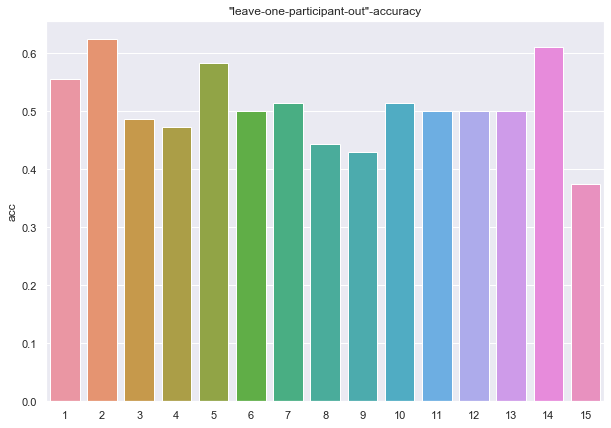

In [126]:
from sklearn.model_selection import LeavePGroupsOut
lpgo = LeavePGroupsOut(n_groups=1)
lpgo.get_n_splits(X_flatten_mean, Y, P)

metric_data = dict()
for train_index, test_index in lpgo.split(X_flatten_mean, Y, P):
    #print("TRAIN:", train_index, "TEST:", test_index)
    #X_train, X_test = X_flatten[train_index], X_flatten[test_index]
    #y_train, y_test = y[train_index], y[test_index]
    print('group/participant in Train: {0} and Test: {1}'.format(np.unique(P[train_index]), np.unique(P[test_index])))
    X_train, X_test = X_flatten_mean[train_index], X_flatten_mean[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]
    
    participant_holdout = int( np.unique(P[test_index])[:])
    
    best_clf = RandomForestRegressor(**clf.best_params_, random_state = 0)
    best_clf.fit(X_train, Y_train)
    Y_pred = best_clf.predict(X_test)
    
    
    #plot confusion matrix per participant
    cm = confusion_matrix(Y_test, Y_pred.round(0))

    fig_cm = print_confusion_matrix(confusion_matrix = cm,
                           class_names = np.unique(Y).astype('str') ,
                           figsize = (10,7), fontsize=14)
    #plt.title('participant: {0}'.format(participant_holdout))
    #plt.show()
    
    #calculate accuracy
    acc = np.diag(cm).sum() / Y_test.shape[0]
    metric_data[participant_holdout] = dict()
    metric_data[participant_holdout]['acc'] = acc

    
df_transfer_participant_metrics = pd.DataFrame(metric_data).T
df_transfer_participant_metrics.head()

plt.clf()
ax = sns.barplot(y = df_transfer_participant_metrics.acc, x= df_transfer_participant_metrics.index)
ax.set_title('"leave-one-participant-out"-accuracy')

### Transfer session ability

#### How big is the prediction-loss of a classifer trained on every but one session of the participant


Method:

train one classifier for each participant on the data: leave one session in training out and validate on the remaining session (participant stays the same)

Question:



Result:


group/participant in Train: [ 2  3  4  5  6  7  8  9 10 11 12 13 14 15] and Test: [1]
holdout sess ['1' '2' '3'], train_sess ['1' '2' '3']
sess in Train: ['2' '3'] and Test: ['1']
sess in Train: ['1' '3'] and Test: ['2']
sess in Train: ['1' '2'] and Test: ['3']
group/participant in Train: [ 1  3  4  5  6  7  8  9 10 11 12 13 14 15] and Test: [2]
holdout sess ['1' '2' '3'], train_sess ['1' '2' '3']
sess in Train: ['2' '3'] and Test: ['1']
sess in Train: ['1' '3'] and Test: ['2']
sess in Train: ['1' '2'] and Test: ['3']
group/participant in Train: [ 1  2  4  5  6  7  8  9 10 11 12 13 14 15] and Test: [3]
holdout sess ['1' '2' '3'], train_sess ['1' '2' '3']
sess in Train: ['2' '3'] and Test: ['1']
sess in Train: ['1' '3'] and Test: ['2']
sess in Train: ['1' '2'] and Test: ['3']
group/participant in Train: [ 1  2  3  5  6  7  8  9 10 11 12 13 14 15] and Test: [4]
holdout sess ['1' '2' '3'], train_sess ['1' '2' '3']
sess in Train: ['2' '3'] and Test: ['1']
sess in Train: ['1' '3'] and Test:

Text(0, 0.5, 'prediction accuracy')

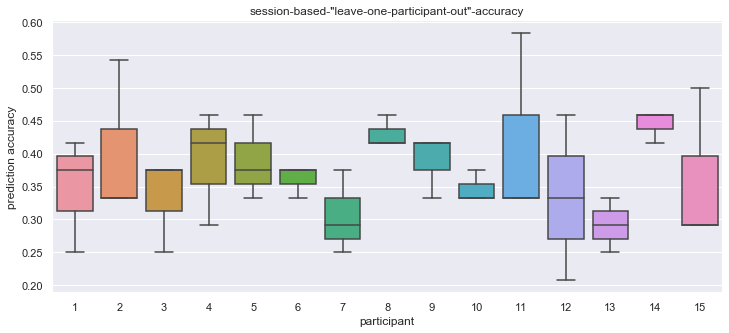

In [184]:
from sklearn.model_selection import LeavePGroupsOut
lpgo = LeavePGroupsOut(n_groups=1)
lpgo2 = LeavePGroupsOut(n_groups=1)
lpgo.get_n_splits(X_flatten_mean, Y, S)

metric_data = dict()
for train_index, test_index in lpgo.split(X_flatten_mean, Y, P):
    #print("TRAIN:", train_index, "TEST:", test_index)
    #X_train, X_test = X_flatten[train_index], X_flatten[test_index]
    #y_train, y_test = y[train_index], y[test_index]
    print('group/participant in Train: {0} and Test: {1}'.format(np.unique(P[train_index]), np.unique(P[test_index])))
    X_train, X_test = X_flatten_mean[train_index], X_flatten_mean[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]
    S_train, S_test = S[train_index], S[test_index]
    participant_holdout = int( np.unique(P[test_index])[:])
    
    print(f'holdout sess {np.unique(S_train)}, train_sess {np.unique(S_test)}')
    metric_data[participant_holdout] = dict()
    #now divide per session:
    for train_sess_index, test_sess_index in lpgo2.split(X_test, Y_test, S_test):
        print('sess in Train: {0} and Test: {1}'.format( np.unique( S_test[train_sess_index] ),
                                                        np.unique( S_test[test_sess_index])) )
        holdout_sess = np.unique( S_test[test_sess_index])
        X_train_sess, X_test_sess = X_test[train_sess_index], X_test[test_sess_index]
        Y_train_sess, Y_test_sess = Y_test[train_sess_index], Y_test[test_sess_index]
        S_train_sess, S_test_sess = S_test[train_sess_index], S_test[test_sess_index]
        
        
        best_clf = RandomForestRegressor(**clf.best_params_, random_state = 0)
        best_clf.fit(X_train_sess, Y_train_sess)
        Y_pred_sess = best_clf.predict(X_test_sess)


        #plot confusion matrix per participant
        cm = confusion_matrix(Y_test_sess, Y_pred_sess.round(0))


        #calculate accuracy
        acc_ = np.diag(cm).sum() / Y_test_sess.shape[0]
        #acc.append(acc_)
        
    
        metric_data[participant_holdout]['holdout_sess_'+holdout_sess[0]] = acc_

        
df_transfer_participant_session_metrics = pd.DataFrame(metric_data).T
df_transfer_participant_session_metrics.head()


#long to wide format
df_transfer_participant_session_metrics= df_transfer_participant_session_metrics.unstack().reset_index()
df_transfer_participant_session_metrics.columns = ['holdout_sess', 'participant', 'acc']
df_transfer_participant_session_metrics.head()


#plotting
ax = sns.boxplot(x = 'participant', y= 'acc', data = df_transfer_participant_session_metrics)
ax.set_title('session-based-"leave-one-participant-out"-accuracy')
ax.set_ylabel('prediction accuracy')

## AUTOML 

In [ ]:
#AUTOML
from auto_ml import Predictor
from auto_ml.utils_models import load_ml_model

# Load data
#df_train, df_test = pd.DataFrame(X_train),
df_train = pd.DataFrame(X_train)
df_train['emotion'] = Y_train
df_train.columns = df_train.columns.values.astype('str')

df_test = pd.DataFrame(X_test)
df_test['emotion'] = Y_test
df_test.columns = df_test.columns.values.astype('str')


# Tell auto_ml which column is 'output'
# Also note columns that aren't purely numerical
# Examples include ['nlp', 'date', 'categorical', 'ignore']
column_descriptions = dict()
for name in df_train.columns:
    if name != 'emotion':
        print('..')
        #column_descriptions[name] = "categorical"
    else:
        column_descriptions[name] = "output"


ml_predictor = Predictor(type_of_estimator='classifier', 
                        column_descriptions=column_descriptions, 
                        )

ml_predictor.train(df_train)

# Score the model on test data
test_score = ml_predictor.score(df_test, df_test.emotion)

# auto_ml is specifically tuned for running in production
# It can get predictions on an individual row (passed in as a dictionary)
# A single prediction like this takes ~1 millisecond
# Here we will demonstrate saving the trained model, and loading it again
file_name = ml_predictor.save()

trained_model = load_ml_model(file_name)

# .predict and .predict_proba take in either:
# A pandas DataFrame
# A list of dictionaries
# A single dictionary (optimized for speed in production evironments)
predictions = trained_model.predict(df_test)
print(predictions)



In [ ]:
#plot confusion matrix with automl

 
cm = confusion_matrix(Y_test, predictions)

fig_cm = print_confusion_matrix(confusion_matrix = cm,
                       class_names = np.unique(Y).astype('str') ,
                       figsize = (10,7), fontsize=14)
plt.title('XGB emotion classifier')

## participant wise - evaluation (can we transfer from all other partipants to one unseen?)

In [ ]:
#write own evaluation function -> leave one participant out
from sklearn.model_selection import LeavePGroupsOut
X = np.array([[1, 2], [3, 4], [5, 6]])
y = np.array([1, 2, 1])
groups = np.array([1, 2, 3])
lpgo = LeavePGroupsOut(n_groups=1)
lpgo.get_n_splits(X, y, groups)

print(lpgo)

for train_index, test_index in lpgo.split(X, y, groups):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    print(X_train, X_test, y_train, y_test)
    
    print('group_index: Train {0}, Test {1}'.format(groups[train_index], groups[test_index]))

In [ ]:
lpgo = LeavePGroupsOut(n_groups=1)
lpgo.get_n_splits(X_flatten, Y, P)

metric_data = dict()
for train_index, test_index in lpgo.split(X_flatten, Y, P):
    #print("TRAIN:", train_index, "TEST:", test_index)
    #X_train, X_test = X_flatten[train_index], X_flatten[test_index]
    #y_train, y_test = y[train_index], y[test_index]
    print('group/participant in Train: {0} and Test: {1}'.format(np.unique(P[train_index]), np.unique(P[test_index])))
    X_train, X_test = X_flatten[train_index], X_flatten[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]
    
    participant_holdout = int( np.unique(P[test_index])[:])
    
    best_clf = DecisionTreeClassifier(**clf.best_params_)
    best_clf.fit(X_train, Y_train)
    Y_pred = best_clf.predict(X_test)
    
    
    #plot confusion matrix per participant
    cm = confusion_matrix(Y_test, Y_pred)

    fig_cm = print_confusion_matrix(confusion_matrix = cm,
                           class_names = np.unique(Y).astype('str') ,
                           figsize = (10,7), fontsize=14)
    #plt.title('participant: {0}'.format(participant_holdout))
    plt.show()
    
    #calculate accuracy
    acc = np.diag(cm).sum() / Y_test.shape[0]
    metric_data[participant_holdout] = dict()
    metric_data[participant_holdout]['acc'] = acc

In [ ]:
for participant in metric_data.keys():
    

In [ ]:
df_transfer_participant_metrics = pd.DataFrame(metric_data).T
df_transfer_participant_metrics.head()

In [ ]:
#plot participants over accuracy
import seaborn as sns

ax = sns.barplot(y = df_transfer_participant_metrics.acc, x= df_transfer_participant_metrics.index)
ax.set_title('leave one participant out accuracy')
